## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
import seaborn as sns
from utils import Scatter_Violin_Plots, Performance_metrics, Merge_Multiple_Files

## Import dataset

In [2]:
# Import the training dataset
train = pd.read_csv('./DataPreProcessing/df_Train.csv', converters={'site_no': str}, low_memory=False)

# Import the testing dataset
test = pd.read_csv('./DataPreProcessing/df_Test.csv', converters={'site_no': str}, low_memory=False)

# Import the NHDPlusV2.1 dataset
NHD = pd.read_csv('./DataPreProcessing/indep_var_reaches_CONUS.txt', converters={'site_no': str}, low_memory=False)

In [3]:
# Spliting the dependent (y) variable and independent (X) variables for training dataset
y_train= train[['stream_wdth_va_mf']]
## Model 1
X_train_m1= train[['q_va_mf', 'TotDASqKM_y', 
                   'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012', 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012',
                   'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde_y','D50_mm_', 'Mean_AI', 
                   'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
                   'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]
## Model 2
X_train_m2= train[['QE_cms', 'TotDASqKM_y', 
                   'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012', 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012',
                   'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde_y','D50_mm_', 'Mean_AI', 
                   'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
                   'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]

# Spliting the dependent (y) variable and independent (X) variables for testing dataset
y_test= test[['stream_wdth_va_mf']]               
## Model 1
X_test_m1= test[['q_va_mf', 'TotDASqKM_y', 
                 'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012', 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012',
                 'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde_y','D50_mm_', 'Mean_AI', 
                 'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
                 'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]
## Model 2
X_test_m2= test[['QE_cms', 'TotDASqKM_y', 
                 'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012', 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012',
                 'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde_y','D50_mm_', 'Mean_AI', 
                 'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
                 'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]


# Excluding independent (X) variables for NHDPlusV2.1 dataset (Application)
df_COMID_NHD= NHD[['COMID', 'REACHCODE']] 
X_NHD= NHD[['QE_cms', 'TotDASqKM_y', 
            'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012', 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012',
            'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde_y','D50_mm_', 'Mean_AI', 
            'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
            'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]

## Create models

### a) Make prediction on testing dataset using final MLR mode

In [4]:
# Model 1
m1_Intercept = 0.7644466
m1_q_va_mf = 0.370881
m1_CAT_EVI_JFM_2012 = -0.155151
m1_ACC_NDAMS2010 = 0.0244578
m1_StreamOrde = 0.4928622
m1_Mean_AI = 0.2495697
m1_D50_mm_ = 0.0393518
m1_NLCD_Developed_ = 0.0240437
m1_CAT_SILTAVE = -0.077093
mlr_pred_m1 =   (10**m1_Intercept) * (X_test_m1['q_va_mf']**m1_q_va_mf) * (X_test_m1['CAT_EVI_JFM_2012']**m1_CAT_EVI_JFM_2012) * (X_test_m1['ACC_NDAMS2010']**m1_ACC_NDAMS2010) * (X_test_m1['StreamOrde_y']**m1_StreamOrde) * (X_test_m1['Mean_AI']**m1_Mean_AI) * (X_test_m1['D50_mm_']**m1_D50_mm_) * (X_test_m1['NLCD_Developed_%']**m1_NLCD_Developed_) * (X_test_m1['CAT_SILTAVE']**m1_CAT_SILTAVE)

# Model 2
m2_Intercept = 0.8896091
m2_CAT_EVI_JFM_2012 = -0.21765
m2_Mean_AI = 0.1500625
m2_NLCD_Developed_ = 0.0339564
m2_QE_cms = 0.4131193
mlr_pred_m2 = (10**m2_Intercept) * (X_test_m2['CAT_EVI_JFM_2012']**m2_CAT_EVI_JFM_2012) * (X_test_m2['Mean_AI']**m2_Mean_AI) *(X_test_m2['NLCD_Developed_%']**m2_NLCD_Developed_) * (X_test_m2['QE_cms']**m2_QE_cms) 

### b) Make prediction on testing dataset using final RFR mode

In [5]:
# Model 1
with open('./RFR/BestParam/meanflow_width_m1_rfr', "rb") as fp:
    RFR_m1 = pickle.load(fp)
rfr_pred_m1 = RFR_m1.predict(X_test_m1.values)

# Model 2
with open('./RFR/BestParam/meanflow_width_m2_rfr', "rb") as fp:
    RFR_m2 = pickle.load(fp)
rfr_pred_m2 = RFR_m2.predict(X_test_m2.values)

### c) Make prediction on testing dataset using final XGBR model

In [6]:
# Model 1
with open('./XGBR/BestParam/meanflow_width_m1_xgbr', "rb") as fp:
    XGBR_m1 = pickle.load(fp)
xgb_pred_m1 = XGBR_m1.predict(X_test_m1.values)

# Model 2
with open('./XGBR/BestParam/meanflow_width_m2_xgbr', "rb") as fp:
    XGBR_m2 = pickle.load(fp)
xgb_pred_m2 = XGBR_m2.predict(X_test_m2.values)

## Performance Metrics

In [7]:
Model_names = ['XGBR', 'RFR', 'MLR']
pred_list= [[xgb_pred_m1, rfr_pred_m1, mlr_pred_m1], [xgb_pred_m2, rfr_pred_m2, mlr_pred_m2]]
Metrics = pd.DataFrame()
for i in range (0,2):
    for j in range(0,3):
        X = y_test
        Y = pred_list[i][j]
        df = pd.DataFrame({f'{Model_names[j]}': [ Performance_metrics(X, Y, "Yes")[0], Performance_metrics(X, Y, "Yes")[1], Performance_metrics(X, Y, "Yes")[2], Performance_metrics(X, Y, "Yes")[3], Performance_metrics(X, Y, "Yes")[4]]})
        Metrics= pd.concat([df, Metrics], axis=1)
    Metrics = Metrics.rename( index={  0:'R\N{SUPERSCRIPT TWO}', 1:'NSE', 2:'KGE', 3:'APB (%)',  4:'RMSE (cms)'})

In [8]:
print('Perfomance Metrics Results for Model 1:')
Metrics.iloc[5:10,3:6].style

Perfomance Metrics Results for Model 1:


,MLR,RFR,XGBR
R²,0.81,0.85,0.84
NSE,0.80,0.83,0.82
KGE,0.77,0.91,0.90
APB (%),30.22,28.73,25.88
RMSE (cms),33.15,30.44,31.61


In [9]:
print('Perfomance Metrics Results for Model 2:')
Metrics.iloc[0:5,0:3].style

Perfomance Metrics Results for Model 2:


,MLR,RFR,XGBR
R²,0.87,0.85,0.86
NSE,0.80,0.85,0.86
KGE,0.66,0.88,0.92
APB (%),30.03,28.93,27.12
RMSE (cms),33.26,28.85,27.75


## Scatter and Violin plots of all models

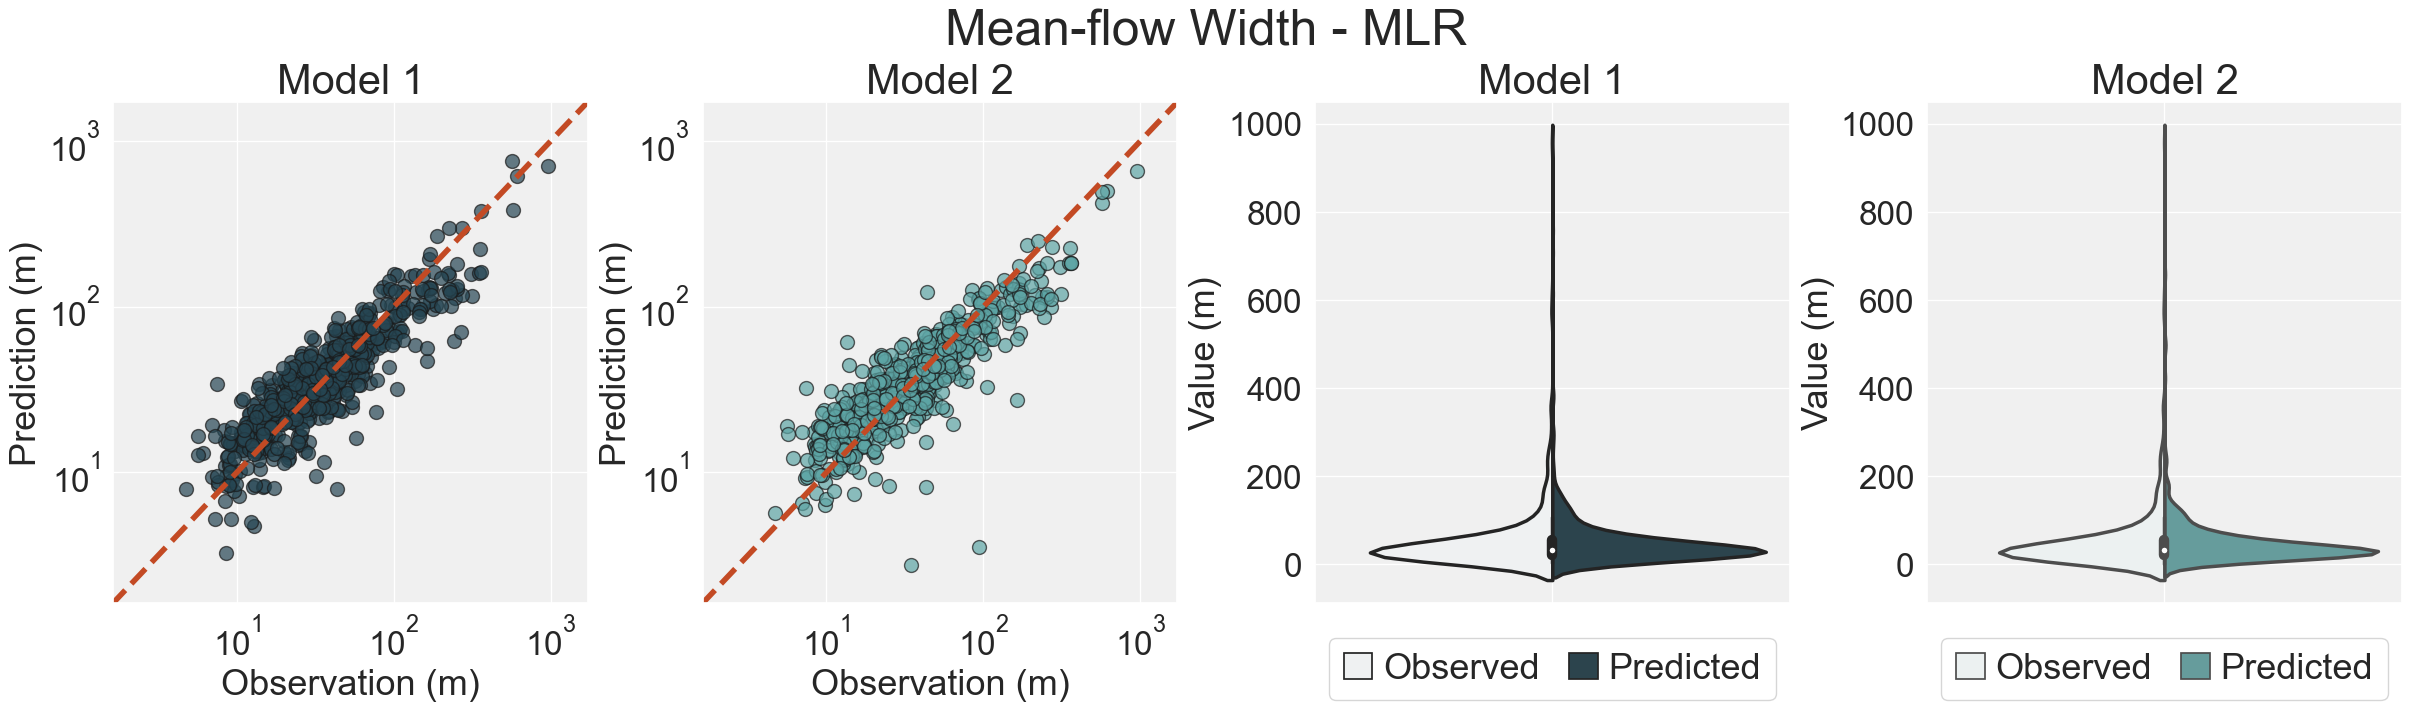

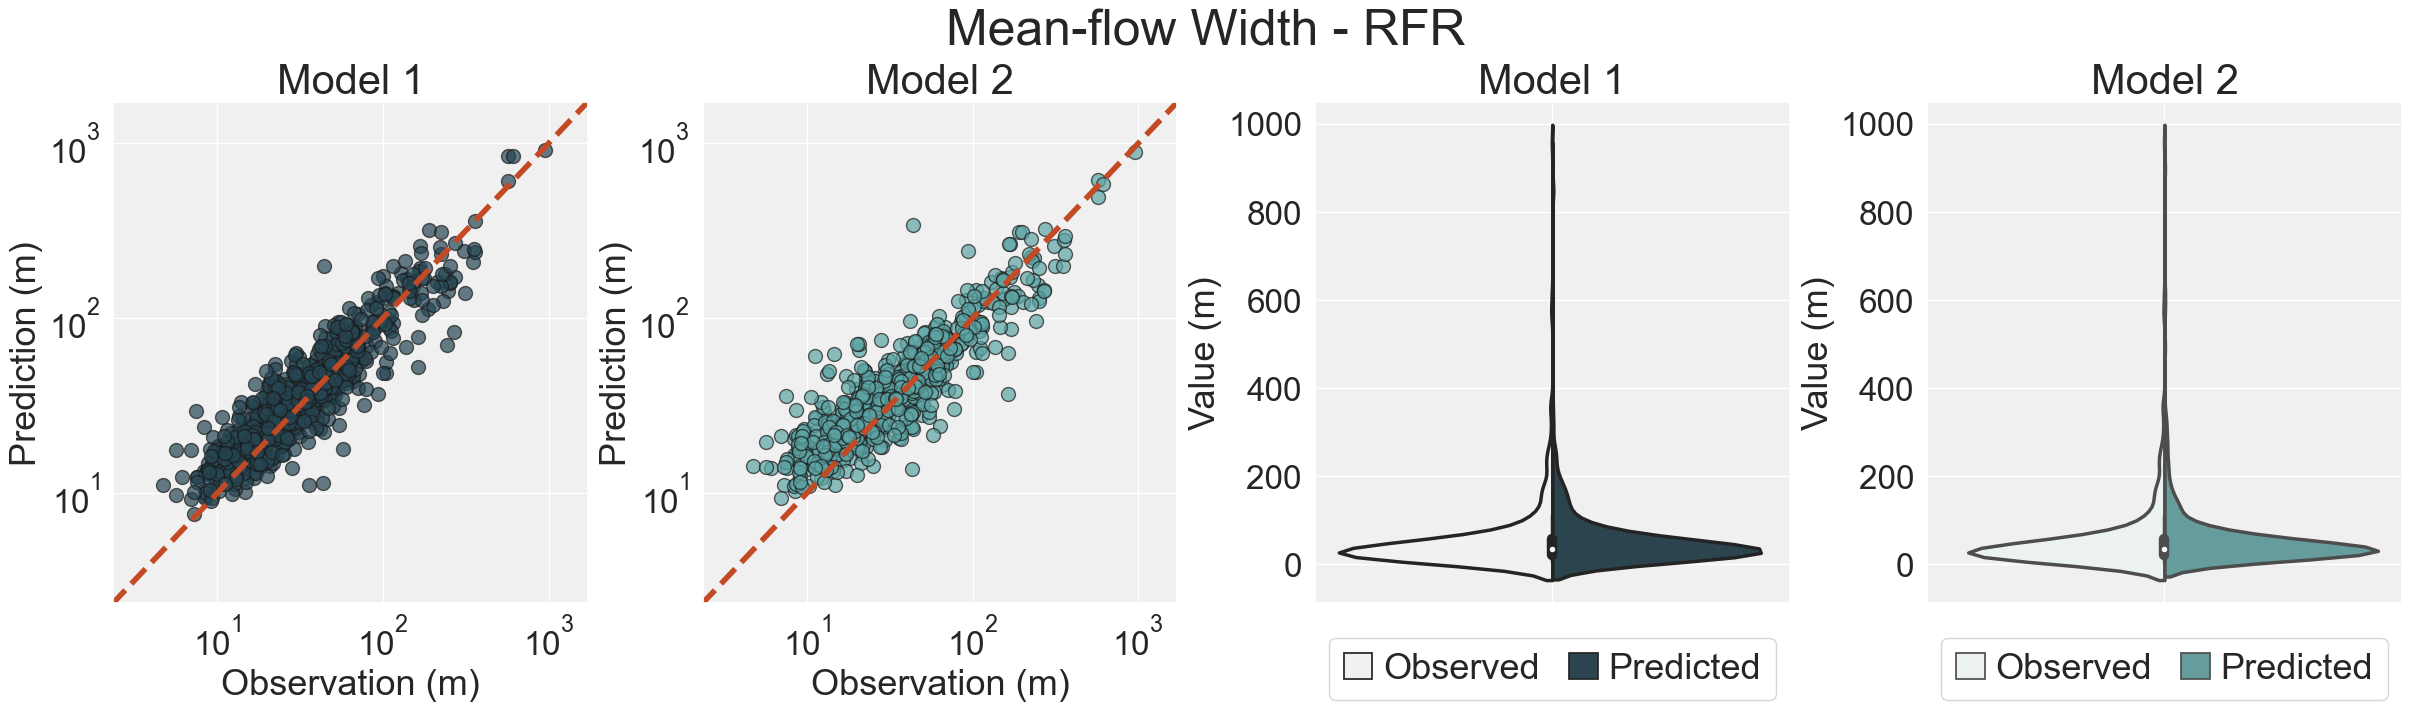

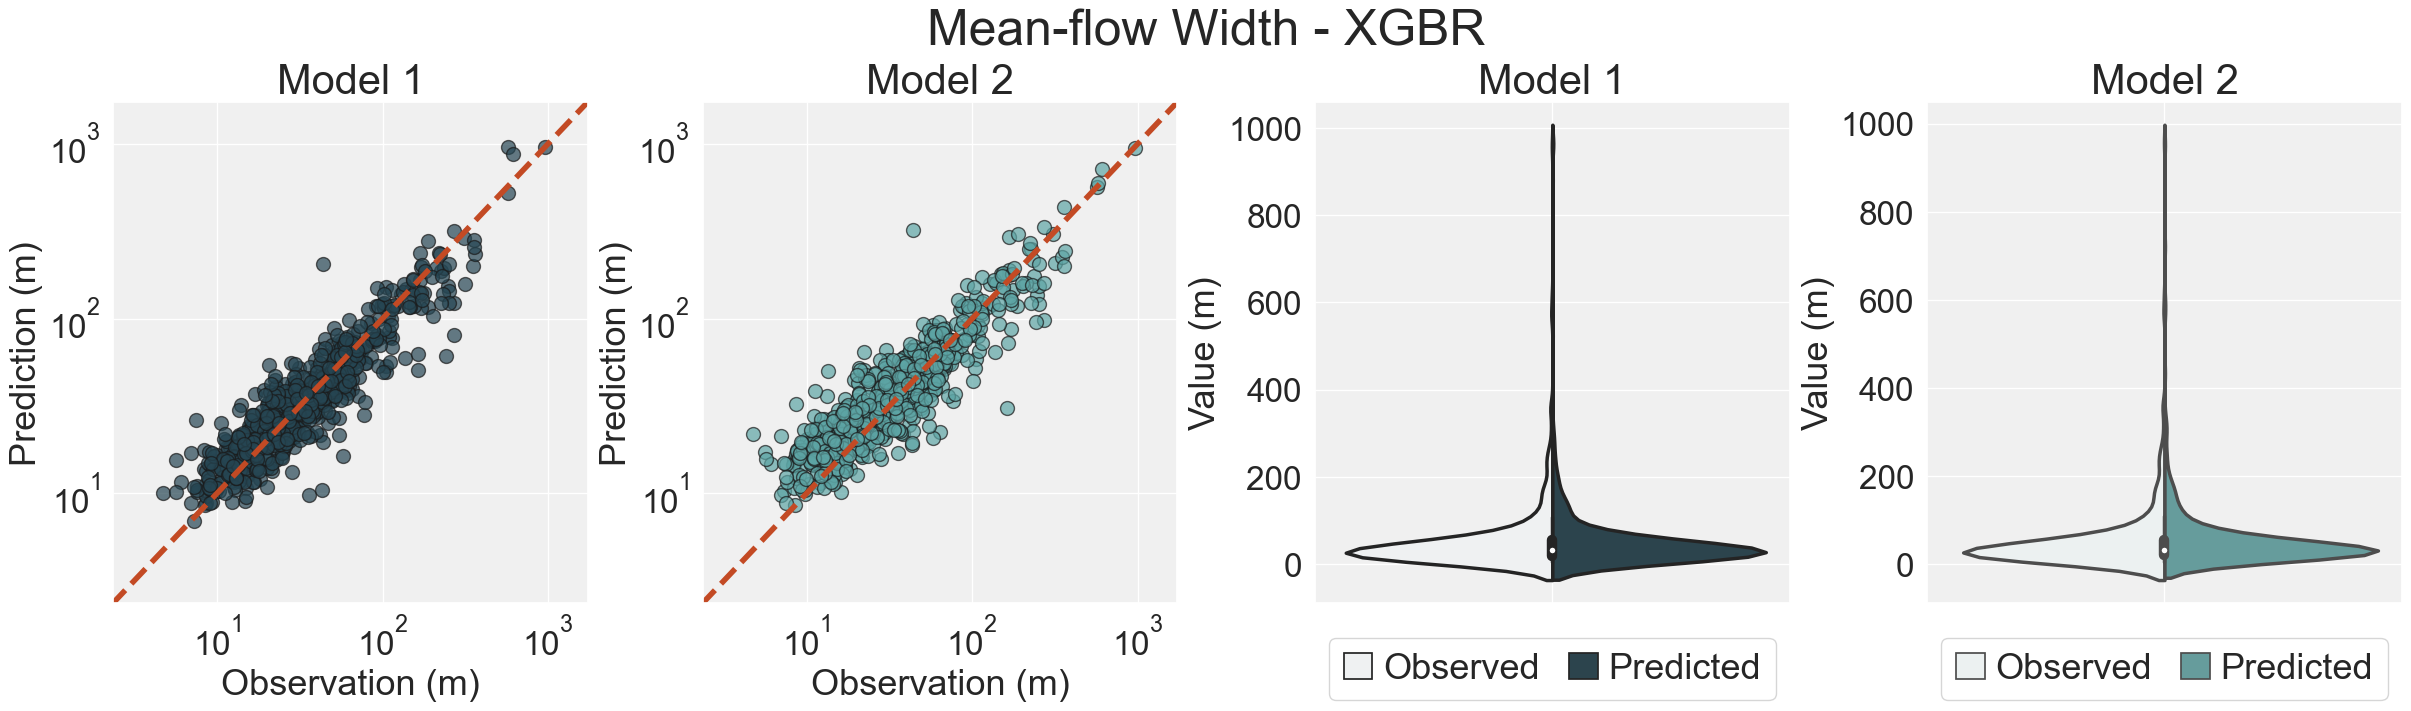

In [10]:
Y = [mlr_pred_m1, rfr_pred_m1, xgb_pred_m1]
y = [mlr_pred_m2, rfr_pred_m2, xgb_pred_m2]
models = ['Mean-flow Width - MLR', 'Mean-flow Width - RFR', 'Mean-flow Width - XGBR']
for i in range (0,3):
    Scatter_Violin_Plots(y_test, Y[i], y[i], "Observation (m)", "Prediction (m)",  "Value (m)", "Model 1", "Model 2", models[i])

## Apply hybrid approcah coupling MLR and XGBR to NHDPlus dataset

In [11]:
# Make prediction on NHDPlusV2.1 dataset using final XGBR model
xgb_pred_NHD0 = pd.DataFrame(XGBR_m2.predict(X_NHD))
xgb_pred_NHD0.columns = ['W_mf_PRE_NHD_xgb']
W_mf = Merge_Multiple_Files([df_COMID_NHD, X_NHD, xgb_pred_NHD0], None)

In [12]:
# If predicted value is equal or greater than zero, keep the predicted value through XGBR
W_mf.loc[W_mf['W_mf_PRE_NHD_xgb'] >= 0, 'mf_width'] = W_mf['W_mf_PRE_NHD_xgb']

# Export the predicted values
W_mf = W_mf[['COMID','REACHCODE', 'TotDASqKM_y', 'StreamOrde_y', 'mf_width']]
W_mf.to_csv('./DataPreProcessing/Output/W_mf_NHD_reaches.txt')